## ClassifyAnything Part 3-3: Random Forest

_Supervised learning for classification_

Random Forest is an ensemble learning method used for both classification and regression tasks. It is based on the concept of decision trees and combines the predictions of multiple individual decision trees to make more accurate and robust predictions.

Here's a short explanation of how Random Forest works:

1. *Random Sampling:* It randomly selects subsets of the original training data with replacement (bootstrap samples). Each subset is used to train a separate decision tree. This process is known as "bagging."
2. *Random Feature Selection:* At each node of the decision tree, only a random subset of features is considered for splitting. This helps to introduce diversity among the individual trees.
3. *Voting (Classification) / Averaging (Regression):* For classification tasks, each decision tree in the Random Forest predicts the class of the input data point. The final prediction is determined by majority voting. For regression tasks, the predictions from all trees are averaged to obtain the final output.
4. *Ensemble Effect:* By combining the predictions of multiple decision trees, Random Forest reduces overfitting and improves the model's generalization performance. It is less susceptible to noise and outliers compared to a single decision tree.

Random Forest is a powerful and widely used algorithm due to its simplicity, robustness, and ability to handle high-dimensional data. It is effective in various applications, including classification, regression, and feature selection tasks.

### 3-3.1 Import data

In [25]:
# import packages
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

with open("outputs/03_Variables.pkl", 'rb') as file:
    (X_train, X_test, y_train, y_test, kfold) = pickle.load(file)

### 3-2.2 Train the model with cross-validation

In [26]:
# Define the hyperparameters to search over in the grid search
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 1, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=kfold, n_jobs=4)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
# Create the Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params)
# Fit the model to the data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_split=5, n_estimators=50)

### 3-2.3 Visualize fine-tuning of hyperparameters

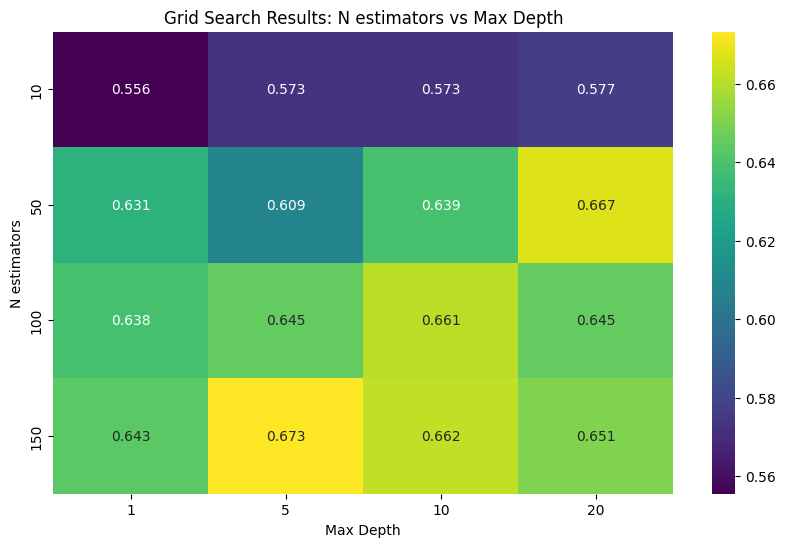

In [27]:
# Access the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_n_estimators', 
                                  columns='param_max_depth', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: N estimators vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('N estimators')
plt.show()

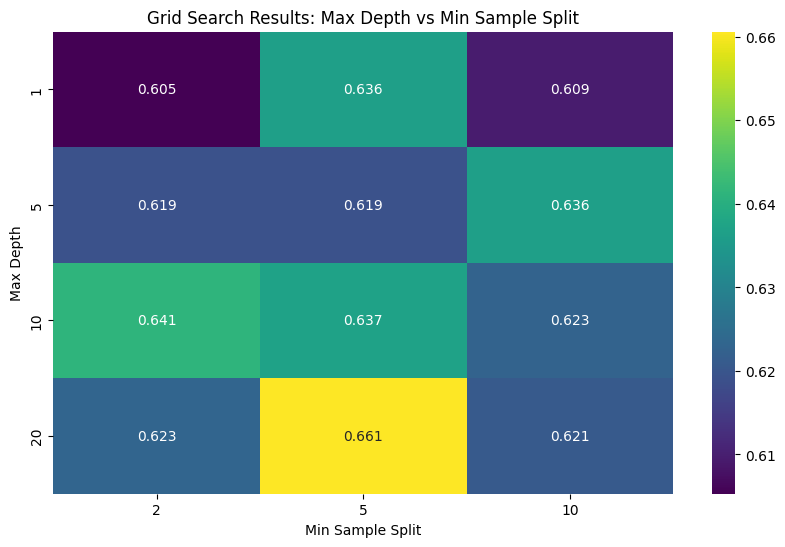

In [28]:
# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_max_depth', 
                                  columns='param_min_samples_split', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: Max Depth vs Min Sample Split')
plt.xlabel('Min Sample Split')
plt.ylabel('Max Depth')
plt.show()

### 3-2.4 Visualize random forest

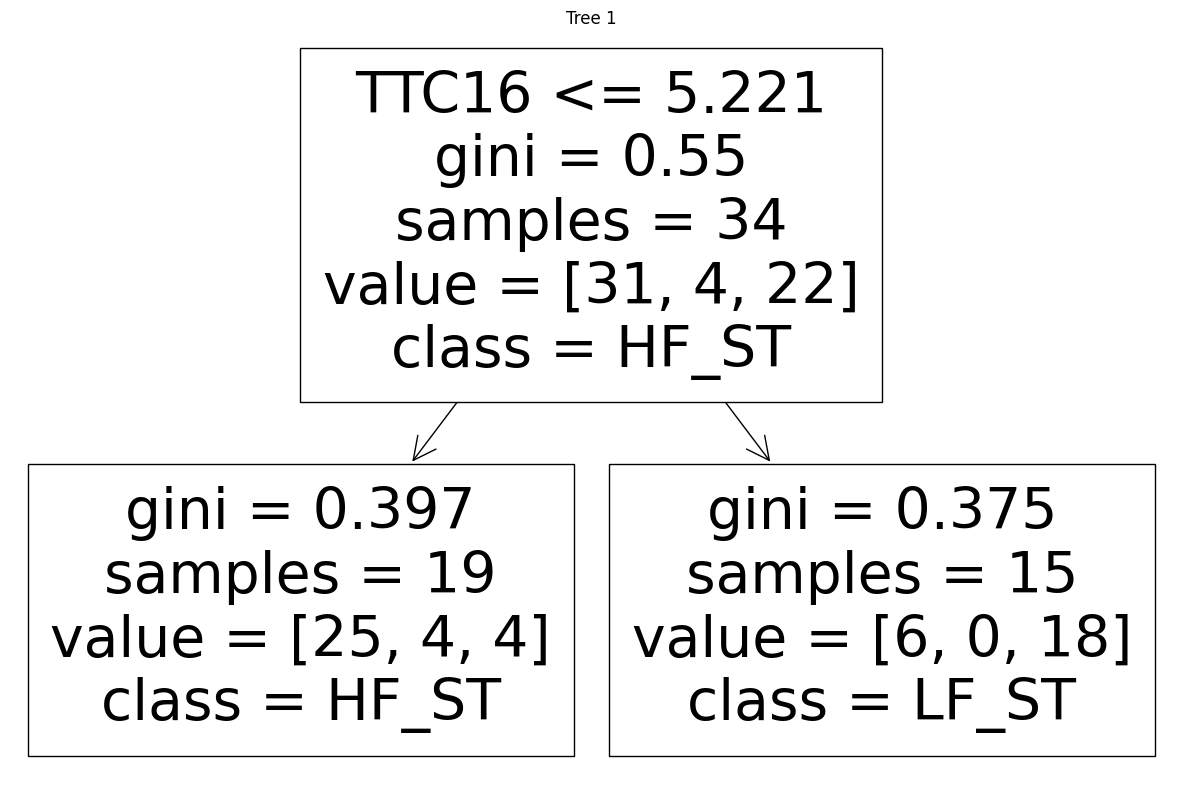

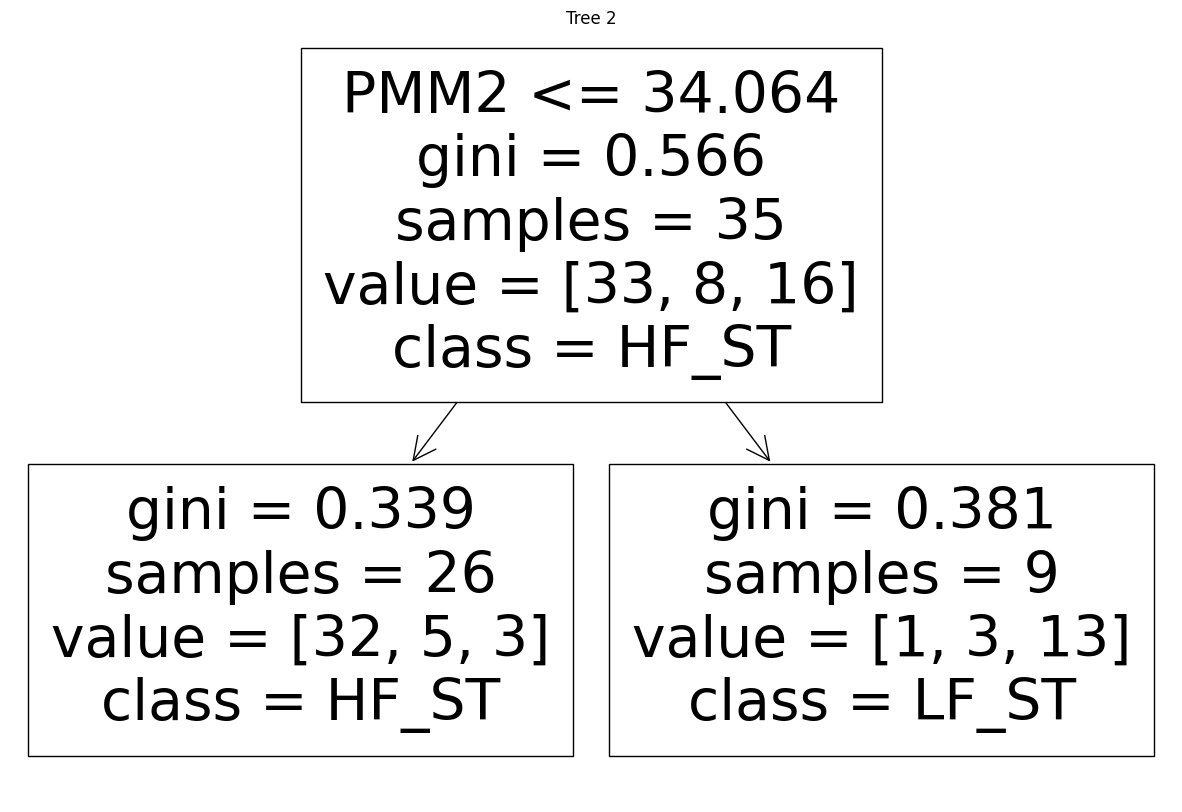

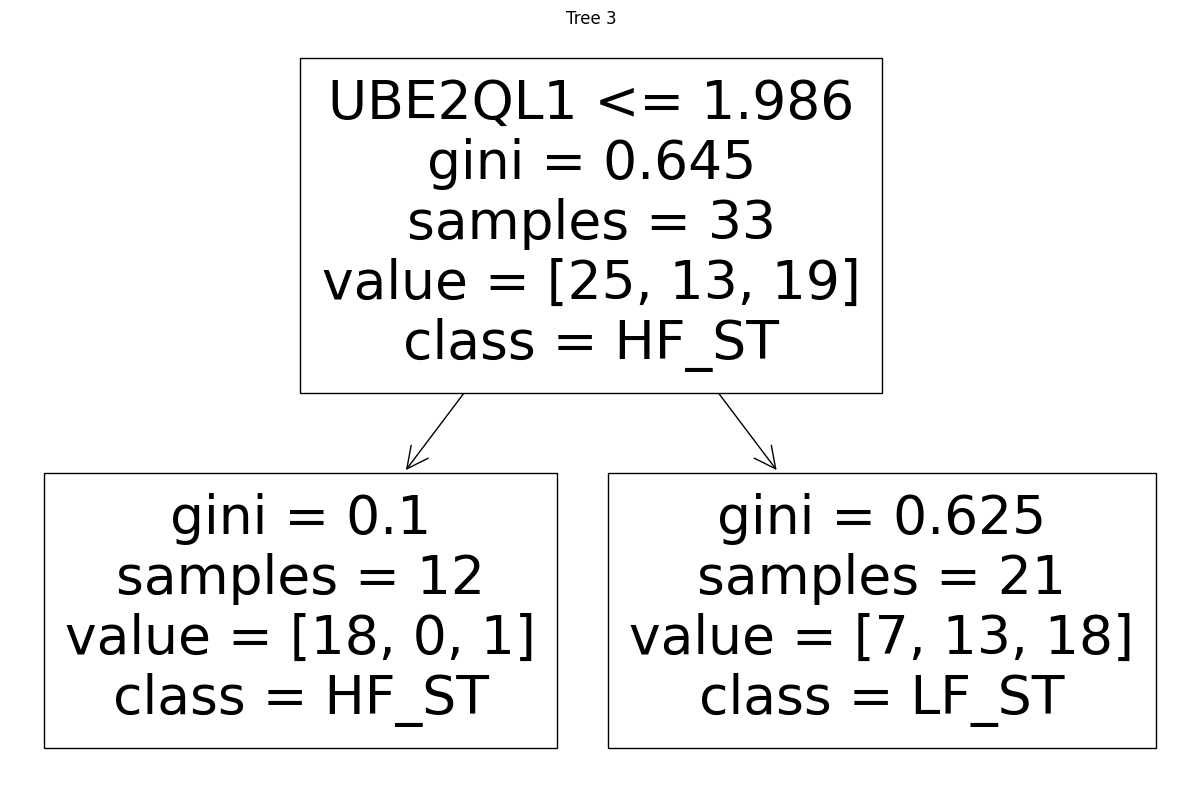

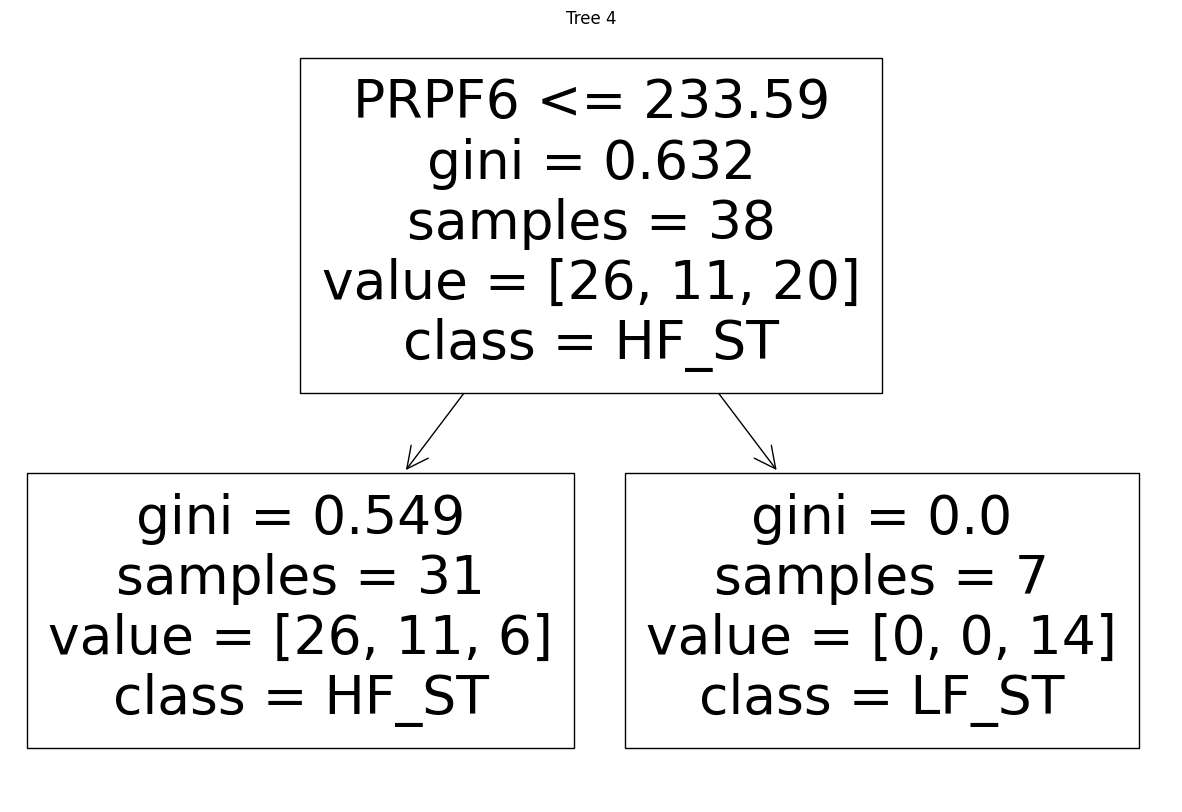

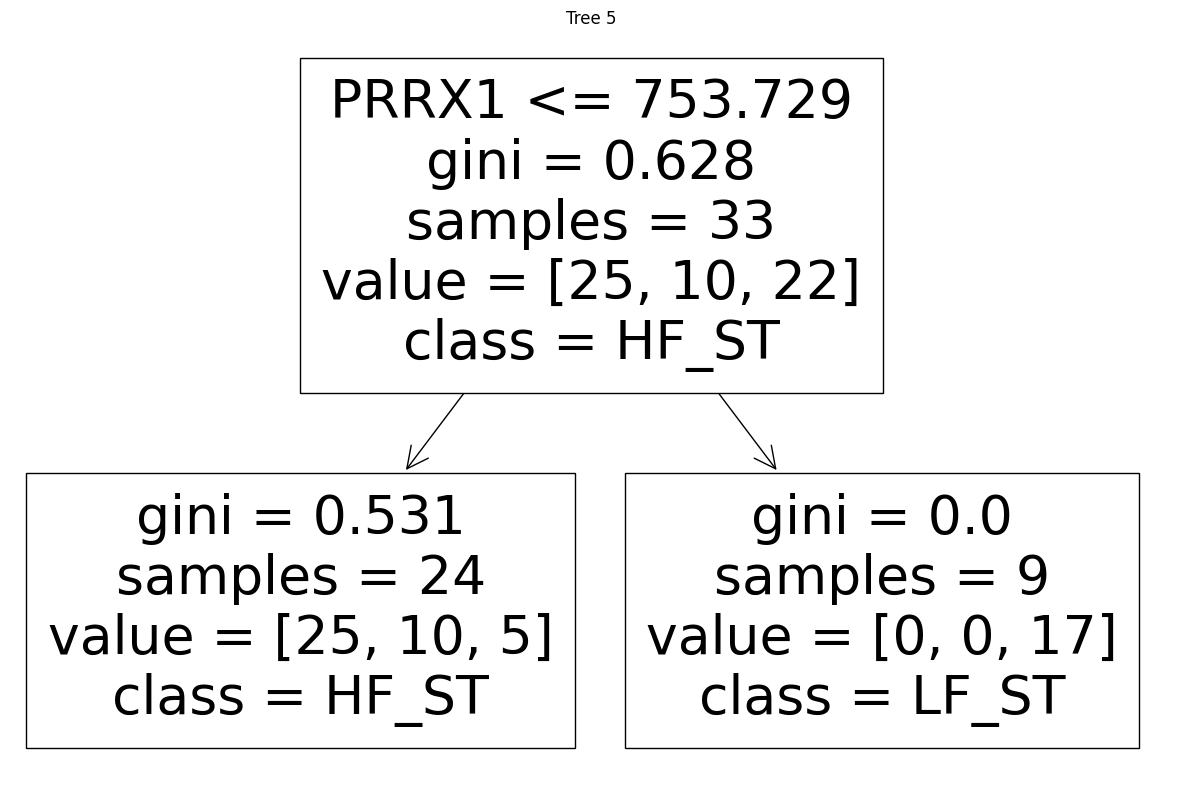

In [29]:
# Access the individual decision trees from the Random Forest
trees = rf_classifier.estimators_
# Visualize the random forest
for i in range(5):
    plt.figure(figsize=(15, 10))
    plot_tree(trees[i], 
            feature_names=X_train.columns.to_list(),
            class_names=np.unique(y_train.to_list()).tolist())
    plt.title("Tree "+str(i+1))
    # Use the line below to verify the label names
    # np.unique(y_train.to_list(), return_counts=True)
    plt.show()

### 3-2.5 Save the model

In [30]:
import joblib
# Save the final trained model to a file
joblib.dump(rf_classifier, 'outputs/03-3_Random_Forest_final_model.joblib')

['outputs/03-3_Random_Forest_final_model.joblib']